In [1]:
make_live = False

In [2]:
from pydataquery import DataQuery
import pandas as pd
from xbbg import blp
import numpy as np
import pytz
import time
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, Dropdown, HBox, VBox, Button, Output, Text, widgets
from IPython.display import display, clear_output
import sympy as sp
from sklearn.metrics import r2_score
from scipy.stats import zscore
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")

if make_live:

    dq = DataQuery(
        client_id='jbAIMF2Tkp0JO3sc',
        client_secret='d7qfzgt55pddjs352sgxosFyI4t2eja07k7opbi6wg9oqjc1OjkdAksn1btmnugeMjchcx2vwTsJupw',
        # calendar = 'CAL_USBANK',
    )
    
    labels = { "CDX Options | IG Main | Standard |  | On the Run (5y) | 3 month | ATM Implied Volatility":"DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATM_IVOL_CAL)", "CDX Options | IG Main | Standard |  | On the Run (5y) | 3 month | Realized Volatility":"DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_HVOL)", "CDX Options | IG Main | Standard |  | On the Run (5y) | 3 month | Volatility Skew (75-25 Delta)":"DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_VOL_SKEW_CAL)", "CDX Options | HY Main | Standard |  | On the Run (5y) | 3 month | ATM Implied Volatility":"DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATM_S_IVOL_CAL)", "CDX Options | HY Main | Standard |  | On the Run (5y) | 3 month | Realized Volatility":"DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_HVOL)", "CDX Options | HY Main | Standard |  | On the Run (5y) | 3 month | Volatility Skew (75-25 Delta)":"DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_VOL_SKEW_CAL)", "iTraxx Options (% of ATM) | Main | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Main | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEEUR05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Main | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "iTraxx Options (% of ATM) | Crossover | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Crossover | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEHY05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Crossover | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "iTraxx Options (% of ATM) | Senior Financial | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Senior Financial | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPESEN05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Senior Financial | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "iTraxx Options (% of ATM) | Sub Financial | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Sub Financial | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPESUB05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Sub Financial | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)"}
    
    new_labels = {}
    for key, val in labels.items():
        if "CDX" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[5]}_{key.split(" | ")[6]}")
        if "iTraxx" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[3]}_{key.split(" | ")[4]}")
        new_key = new_key.replace("IG Main","CDX IG 5Y").replace("HY Main","CDX HY 5Y").\
            replace("Main","ITRX Main 5Y").replace("Crossover","ITRX Xover 5Y").replace("Senior Financial","ITRX SNRFIN 5Y").\
            replace("Sub Financial","ITRX SUBFIN 5Y").replace("3 month","3M").replace("ATM Implied Volatility","iVol").\
            replace("Realized Volatility","rVol")#.replace("Volatility Skew (75-25 Delta)","Vol
        new_labels[new_key] = val
        # print(new_key)
    
    labels={"CDX Options | IG Main | Delta based Strikes | 25% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,25D_3M_IVOL)", "CDX Options | IG Main | Delta based Strikes | 50% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,50D_3M_IVOL)", "CDX Options | HY Main | Delta based Strikes | 25% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,25D_3M_IVOL)", "CDX Options | HY Main | Delta based Strikes | 50% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,50D_3M_IVOL)", "iTraxx Options (Delta) | Main | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Main | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Crossover | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Crossover | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Senior Financial | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Senior Financial | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Sub Financial | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Sub Financial | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)"}
    
    for key, val in labels.items():
        if "CDX" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[3]}_{key.split(" | ")[5]}_{key.split(" | ")[6]}")
        if "iTraxx" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[2]}_{key.split(" | ")[3]}_{key.split(" | ")[4]}")
        new_key = new_key.replace("IG Main","CDX IG 5Y").replace("HY Main","CDX HY 5Y").\
            replace("Main","ITRX Main 5Y").replace("Crossover","ITRX Xover 5Y").replace("Senior Financial","ITRX SNRFIN 5Y").\
            replace("Sub Financial","ITRX SUBFIN 5Y").replace("3 month","3M").replace("Implied Volatility","iVol").\
            replace("Implied Vol","iVol")
        new_labels[new_key] = val
    
    labels = { "HYG 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE))) ) * SQRT(260) * 100" , "HYG 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "HYG 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE)" , "HYG 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE))) ) * SQRT(260) * 100" , "HYG 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "HYG 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE)" , "HYG 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE))) ) * SQRT(260) * 100" , "HYG 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "HYG 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE)" , "LQD 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE))) ) * SQRT(260) * 100" , "LQD 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "LQD 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE)" , "LQD 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE))) ) * SQRT(260) * 100" , "LQD 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "LQD 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE)" , "LQD 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE))) ) * SQRT(260) * 100" , "LQD 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "LQD 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE)" , "IHYG 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE))) ) * SQRT(260) * 100" , "IHYG 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "IHYG 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE)" , "IHYG 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE))) ) * SQRT(260) * 100" , "IHYG 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "IHYG 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE)" , "IHYG 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE))) ) * SQRT(260) * 100" , "IHYG 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "IHYG 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE)" , "TLT 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE))) ) * SQRT(260) * 100" , "TLT 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "TLT 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE)" , "TLT 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE))) ) * SQRT(260) * 100" , "TLT 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "TLT 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE)" , "TLT 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE))) ) * SQRT(260) * 100" , "TLT 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "TLT 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE)",
        "IG OTR Option 5Y 1M ATM Implied Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_ATM_IVOL_CAL)", "IG OTR Option 5Y 1M Realized Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_HVOL)", "IG OTR Option 5Y 1M Implied BP Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_ATM_S_BE_CAL)", "IG OTR Option 5Y 1M ATM Forward Spread" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_ATMF_CAL)", "IG OTR Option 5Y 1M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_VOL_SKEW_CAL)", "IG OTR Option 5Y 1M Spot" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "IG OTR Option 5Y 3M ATM Implied Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATM_IVOL_CAL)", "IG OTR Option 5Y 3M Realized Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_HVOL)", "IG OTR Option 5Y 3M Implied BP Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATM_S_BE_CAL)", "IG OTR Option 5Y 3M ATM Forward Spread" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATMF_CAL)", "IG OTR Option 5Y 3M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_VOL_SKEW_CAL)", "IG OTR Option 5Y 3M Spot" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "IG OTR Option 5Y 6M ATM Forward Spread" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,6M_ATMF_CAL)", "IG OTR Option 5Y 6M Spot" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "HY OTR Option 5Y 1M ATM Implied Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATM_S_IVOL_CAL)", "HY OTR Option 5Y 1M Realized Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_S_HVOL)", "HY OTR Option 5Y 1M ATM Forward Spread" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATMF_S_CAL)", "HY OTR Option 5Y 1M Implied BP Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATM_S_BE_CAL)", "HY OTR Option 5Y 1M ATM Forward Price" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATMF_CAL)", "HY OTR Option 5Y 1M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_S_VOL_SKEW_CAL)", "HY OTR Option 5Y 1M Spot" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CLEAN_MID)", "HY OTR Option 5Y 3M ATM Implied Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATM_S_IVOL_CAL)", "HY OTR Option 5Y 3M Realized Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_HVOL)", "HY OTR Option 5Y 3M ATM Forward Spread" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATMF_S_CAL)", "HY OTR Option 5Y 3M Implied BP Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATM_S_BE_CAL)", "HY OTR Option 5Y 3M ATM Forward Price" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATMF_CAL)", "HY OTR Option 5Y 3M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_VOL_SKEW_CAL)", "HY OTR Option 5Y 3M Spot" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CLEAN_MID)", "HY OTR Option 5Y 6M ATM Forward Spread" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,6M_ATMF_S_CAL)", "HY OTR Option 5Y 6M ATM Forward Price" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,6M_ATMF_CAL)", "HY OTR Option 5Y 6M Spot" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CLEAN_MID)", "EM OTR Option 1M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATM_S_IVOL_CAL)", "EM OTR Option 1M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_S_HVOL)", "EM OTR Option 1M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATMF_S_CAL)", "EM OTR Option 1M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATM_S_BE_CAL)", "EM OTR Option 1M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATMF_CAL)", "EM OTR Option 1M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_S_VOL_SKEW_CAL)", "EM OTR Option 1M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 2M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATM_S_IVOL_CAL)", "EM OTR Option 2M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_S_HVOL)", "EM OTR Option 2M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATMF_S_CAL)", "EM OTR Option 2M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATM_S_BE_CAL)", "EM OTR Option 2M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATMF_CAL)", "EM OTR Option 2M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_S_VOL_SKEW_CAL)", "EM OTR Option 2M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 3M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATM_S_IVOL_CAL)", "EM OTR Option 3M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_S_HVOL)", "EM OTR Option 3M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATMF_S_CAL)", "EM OTR Option 3M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATM_S_BE_CAL)", "EM OTR Option 3M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATMF_CAL)", "EM OTR Option 3M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_S_VOL_SKEW_CAL)", "EM OTR Option 3M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 4M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATM_S_IVOL_CAL)", "EM OTR Option 4M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_S_HVOL)", "EM OTR Option 4M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATMF_S_CAL)", "EM OTR Option 4M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATM_S_BE_CAL)", "EM OTR Option 4M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATMF_CAL)", "EM OTR Option 4M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_S_VOL_SKEW_CAL)", "EM OTR Option 4M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 5M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATM_S_IVOL_CAL)", "EM OTR Option 5M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_S_HVOL)", "EM OTR Option 5M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATMF_S_CAL)", "EM OTR Option 5M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATM_S_BE_CAL)", "EM OTR Option 5M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATMF_CAL)", "EM OTR Option 5M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_S_VOL_SKEW_CAL)", "EM OTR Option 5M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "IG OTR 3Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF03ONRUN,JPM_CDSSPREAD_MID)", "IG OTR 5Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "IG OTR 7Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF07ONRUN,JPM_CDSSPREAD_MID)", "IG OTR 10Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF10ONRUN,JPM_CDSSPREAD_MID)", "IG Roll-Adj. 5 Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF05RISKNDEFAULT,JPM_CDSSPREAD_MID)", "HY OTR 3Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF03ONRUN,JPM_CDSSPREAD_MID)", "HY OTR 5Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CDSSPREAD_MID)", "HY OTR 7Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF07ONRUN,JPM_CDSSPREAD_MID)", "HY OTR 10Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF10ONRUN,JPM_CDSSPREAD_MID)", "HY Roll-Adj. 5 Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF05RISKNDEFAULT,JPM_CDSSPREAD_MID)", "Emerging Markets CDX.EM On the run 5Y Sprd" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CDSSPREAD_MID)", "Main 100% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "Main 100% 3M Realised Vol_Call" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEEUR05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Main 100% 3M Vol Skew 25 Delta_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Main 100% 3M Calendar Skew 3M - 1M_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_1M_INTERP,JPM_ATMVOL)", "Main 100% 3M CDS Spread Adj._Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Main 100% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)", "Main 100% 3M Realised Vol_Put" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEEUR05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Main 100% 3M Vol Skew 25 Delta_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Main 100% 3M Calendar Skew 3M - 1M_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P100P_1M_INTERP,JPM_ATMVOL)", "Main 100% 3M CDS Spread Adj._Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Xover 100% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "Xover 100% 3M Realised Vol_Call" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEHY05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Xover 100% 3M Vol Skew 25 Delta_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Xover 100% 3M Calendar Skew 3M - 1M_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_1M_INTERP,JPM_ATMVOL)", "Xover 100% 3M CDS Spread Adj._Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Xover 100% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)", "Xover 100% 3M Realised Vol_Put" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEHY05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Xover 100% 3M Vol Skew 25 Delta_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Xover 100% 3M Calendar Skew 3M - 1M_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P100P_1M_INTERP,JPM_ATMVOL)", "Xover 100% 3M CDS Spread Adj._Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Main 25% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Main 25% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "Main 75% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C75D_3M_INTERP,JPM_VOL)", "Main 75% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P75D_3M_INTERP,JPM_VOL)", "Xover 25% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Xover 25% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "Xover 75% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C75D_3M_INTERP,JPM_VOL)", "Xover 75% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P75D_3M_INTERP,JPM_VOL)", "Main OTR 5Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx-onrun/5y/JPM_CDSSPREAD_MID)", "Main OTR 5Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeEur5yOnrun,JPM_CDSSPREAD_CM_ADJ)", "Main OTR 10Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx-onrun/10y/JPM_CDSSPREAD_MID)", "Main OTR 10Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeEur10yOnrun,JPM_CDSSPREAD_CM_ADJ)", "Xover OTR 5Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx_crossover-onrun/5y/JPM_CDSSPREAD_MID)", "Xover OTR 5Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeHy5yOnrun,JPM_CDSSPREAD_CM_ADJ)", "Xover OTR 10Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx_crossover-onrun/10y/JPM_CDSSPREAD_MID)", "Xover OTR 10Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeHy10yOnrun,JPM_CDSSPREAD_CM_ADJ)"}
    
    labels = new_labels
    
    job = dq.create_job(expressions = list(labels.values()))
    dq.start_date = 'TODAY-10Y'
    job.execute()
    df = job.to_dataframe()
    df = job.to_pivot_table()
    df = df.T
    df = df[list(labels.values())]
    df.index.name = 'Date'
    df.index = pd.to_datetime(df.index, format='%Y%m%d').date
    
    df.rename(columns={v:k for k, v in labels.items()},inplace=True)
    df.columns.name = None
    clear_output(wait=False)
    df.index = pd.to_datetime(df.index)
    df.to_parquet("DQ Option Data.parquet")
else:
    df = pd.read_parquet("DQ Option Data.parquet")

In [3]:
df = pd.read_parquet("DQ Option Data.parquet")
df.index = pd.to_datetime(df.index)
df2 = pd.read_excel("Equity Index Data.xlsx", parse_dates=True).iloc[2:,:]
all_df = None
for i in range(len(df2.columns))[::2]:
    current_df = df2.iloc[:,[i,i+1]]
    current_df.columns = ["Date",current_df.columns[1]]
    current_df = current_df.set_index("Date")
    current_df = current_df[~pd.isna(current_df.index)]
    all_df = pd.concat([all_df,current_df],axis=1)    

new_col = []
for item in all_df.columns:
    if len(item.split("_"))==4:
        new_col += [item.split("_")[0] + "_" + item.split("_")[2] + "_" + item.split("_")[1] + "_" + item.split("_")[3]]
    else:
        new_col += [item]
all_df.columns = new_col

for item in all_df.columns:
    test = all_df[[item]].dropna().copy()
    if len(test[test[item]<1]) > 1:
        all_df[item] *=100

df = pd.concat([df, all_df],axis=1).sort_index().copy()
df.columns = df.columns.str.replace("Implied Vol","iVol").str.replace("Realised Vol","rVol").str.\
    replace("IV","iVol").str.replace("%","D")
df = df[[col for col in df.columns if not "Skew" in col]].copy()

In [4]:
etfs = ["HYG US Equity","LQD US Equity","EMB US Equity","VCIT US Equity",
        "IHYG LN Equity","IEAC LN Equity"]
bbg = blp.bdh(tickers=etfs, flds="YAS_ISPREAD_TO_GOVT",start_date=datetime.now()-timedelta(days=5*365))
bbg.columns = [item.split(" ")[0] + " G-Sprd" for item in etfs]
bbg.index = pd.to_datetime(bbg.index)
bg = bbg.copy()

etfs = ["SPX Index","SX5E Index"]
bbg = blp.bdh(tickers=etfs, flds="PX_LAST",start_date=datetime.now()-timedelta(days=5*365))
bbg.columns = [item.split(" ")[0] + " Price" for item in etfs]
bbg.index = pd.to_datetime(bbg.index)
bg = pd.concat([bg, bbg], axis=1)
bbg = bg.copy()

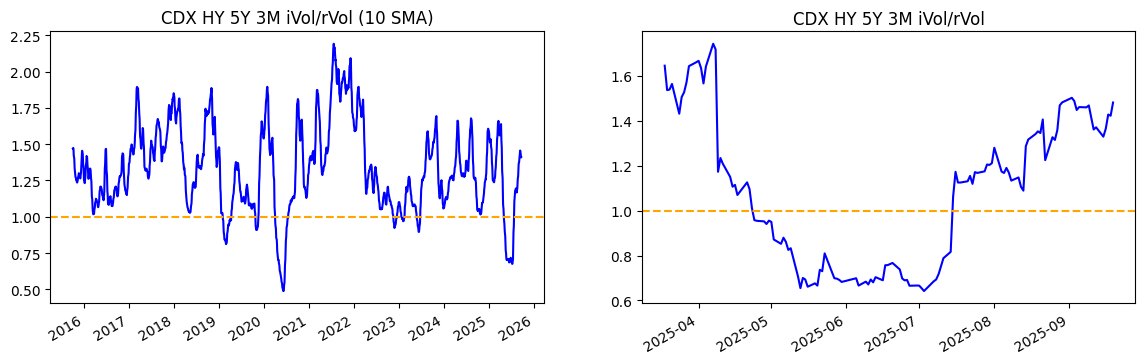

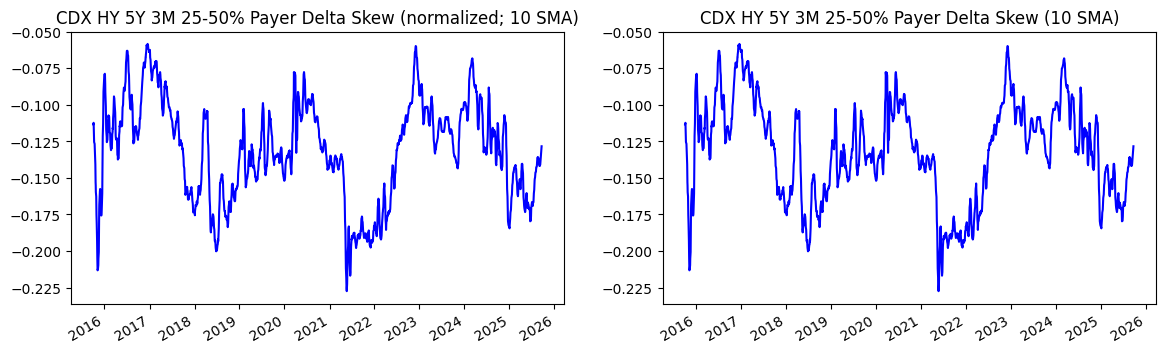

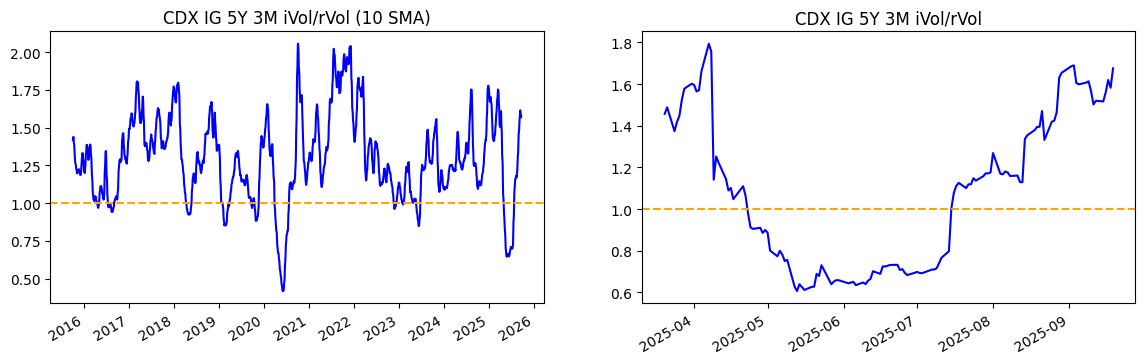

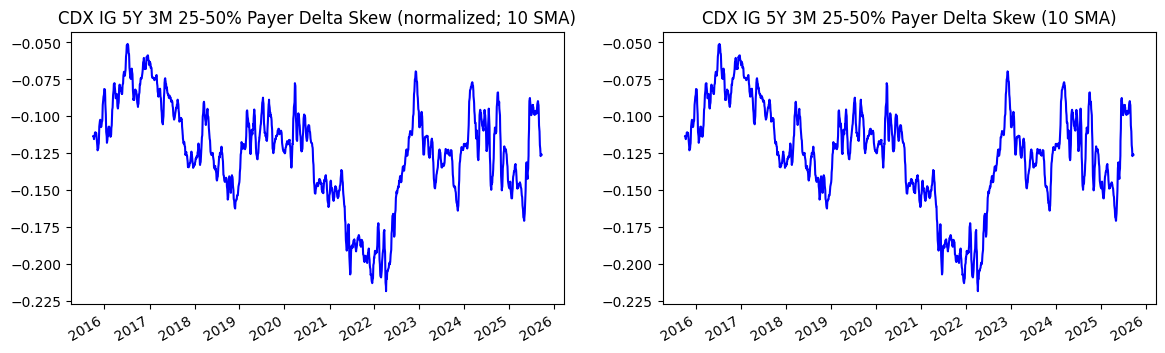

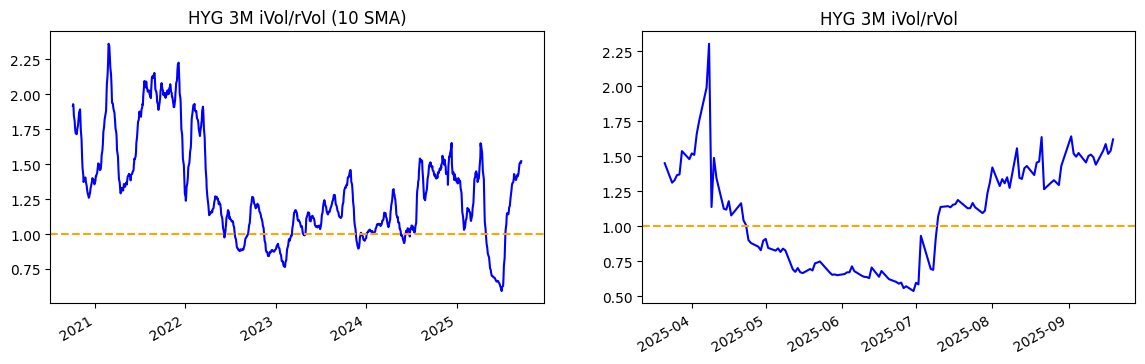

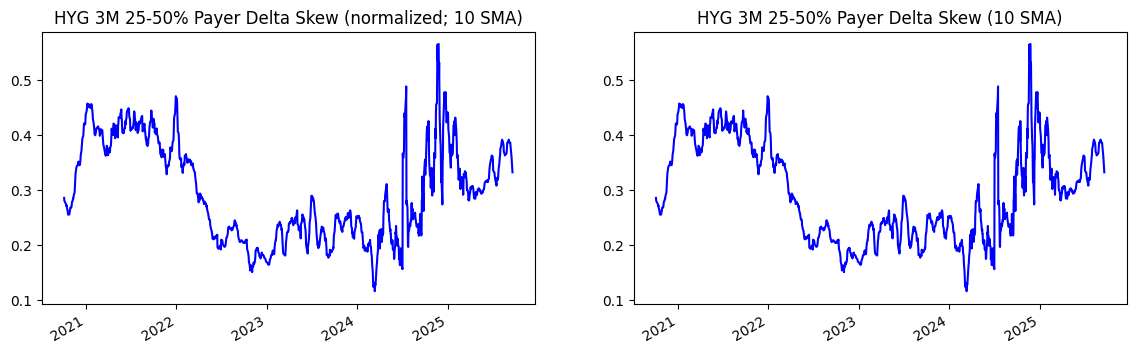

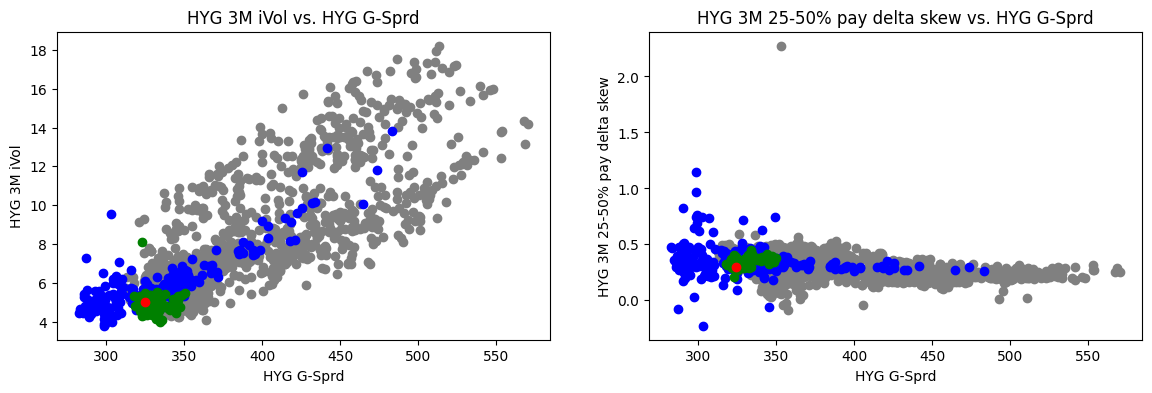

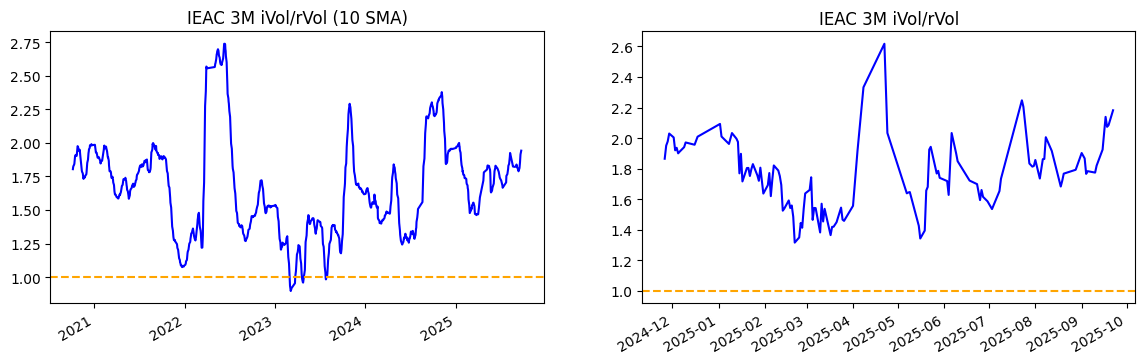

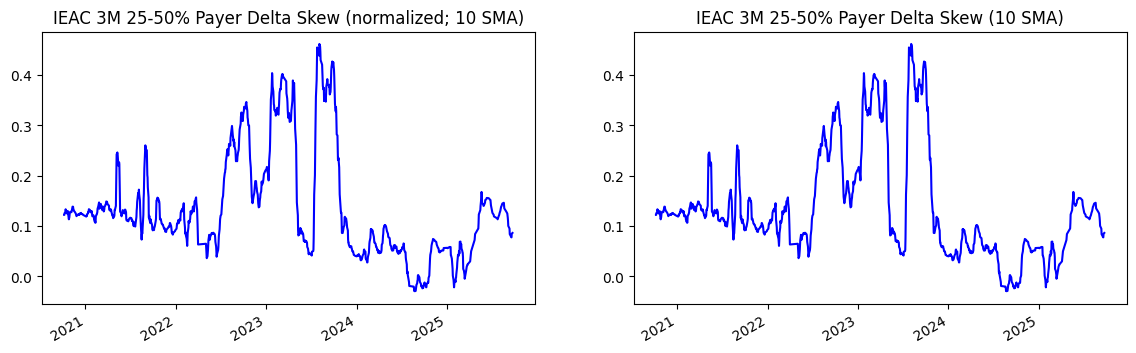

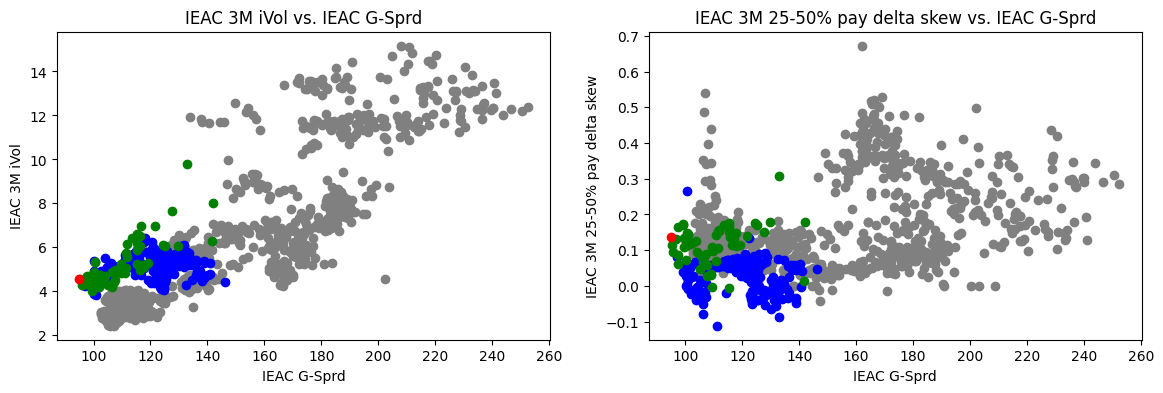

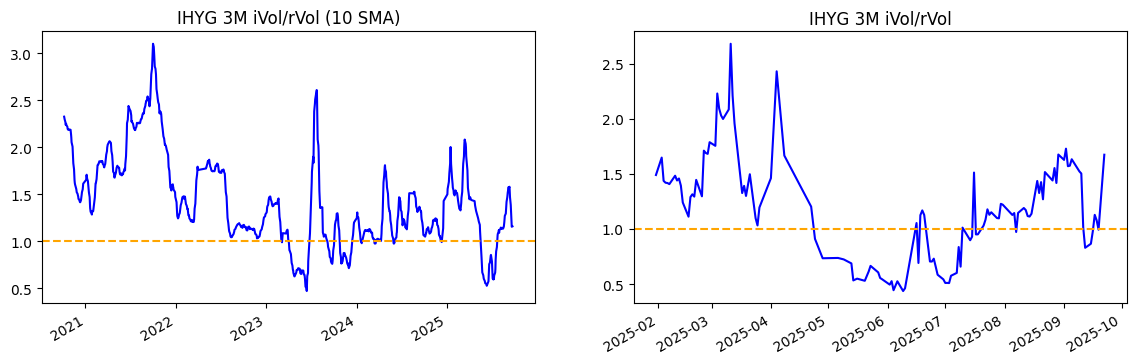

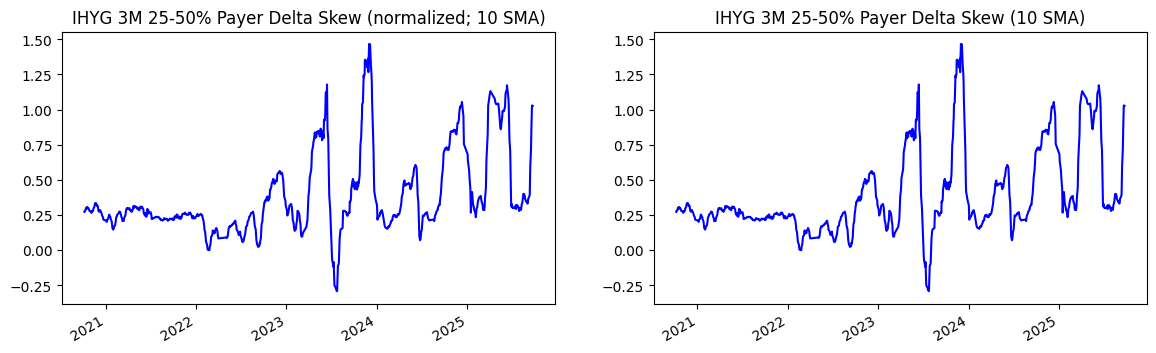

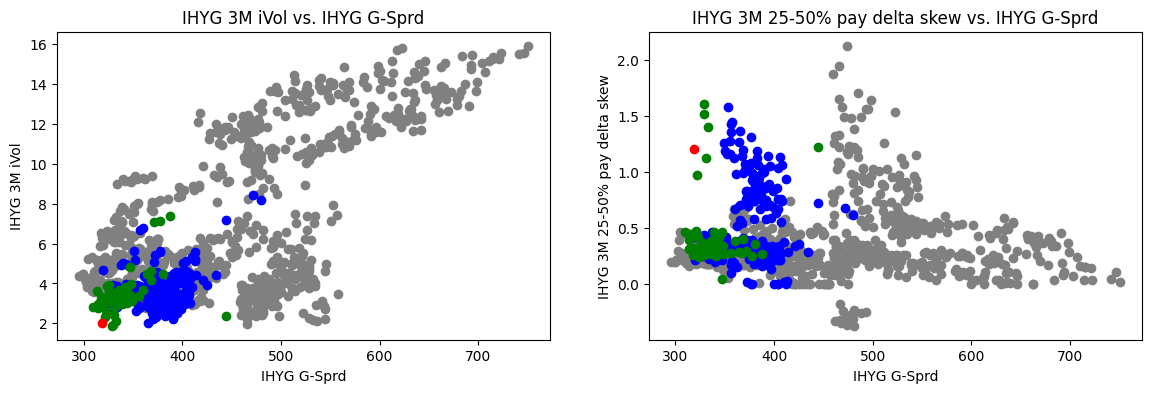

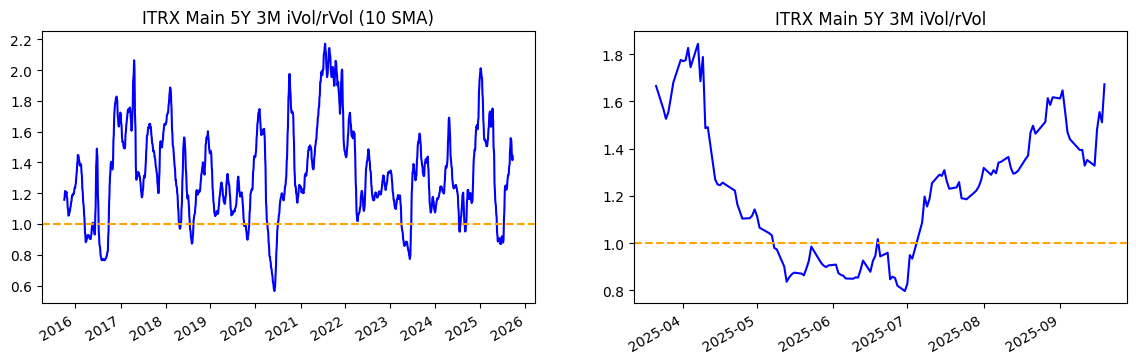

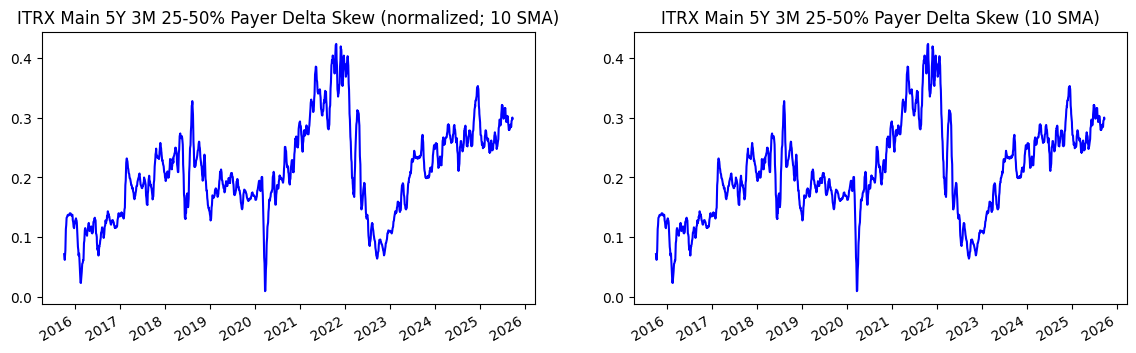

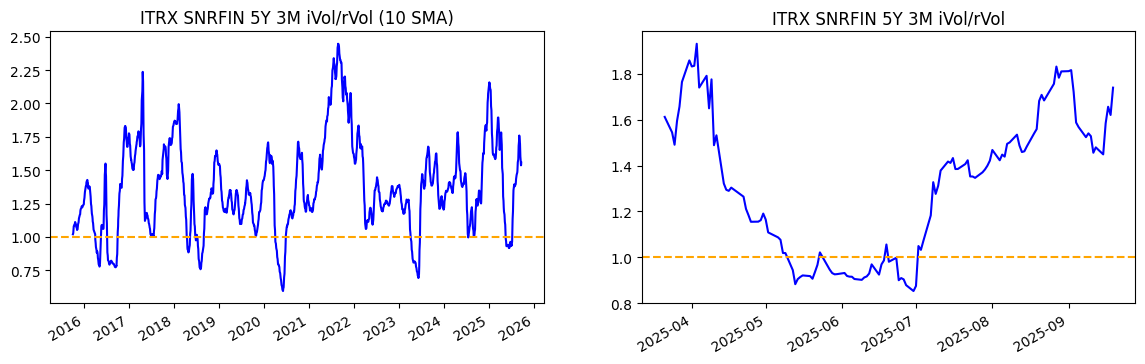

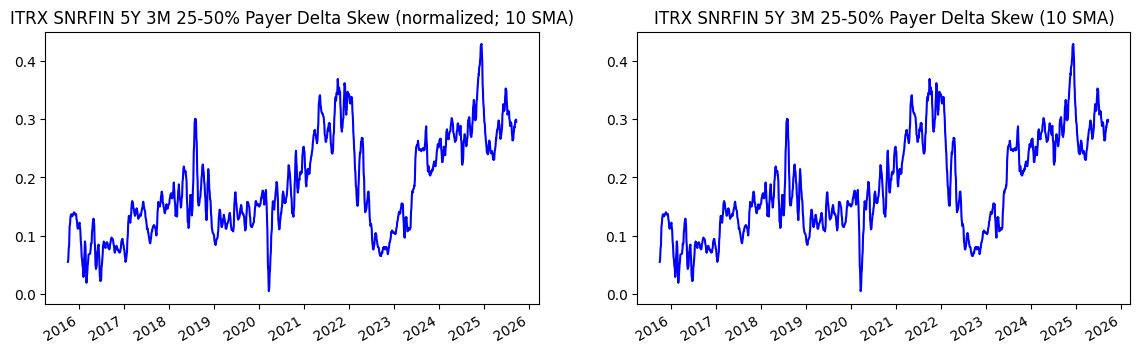

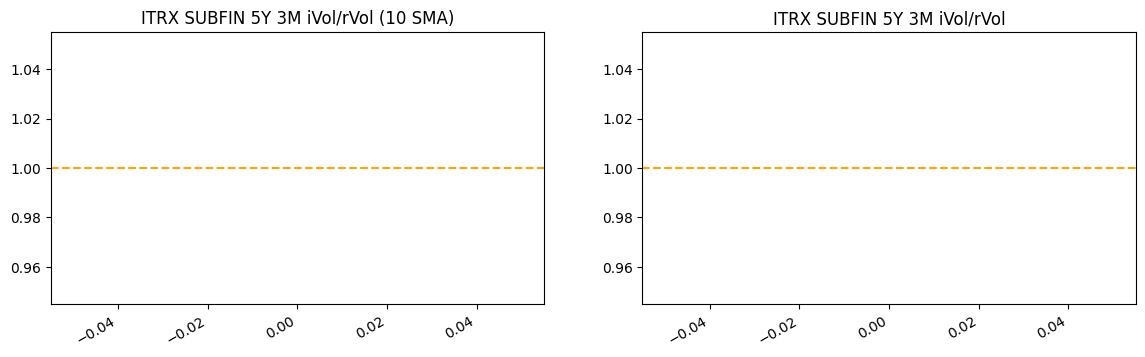

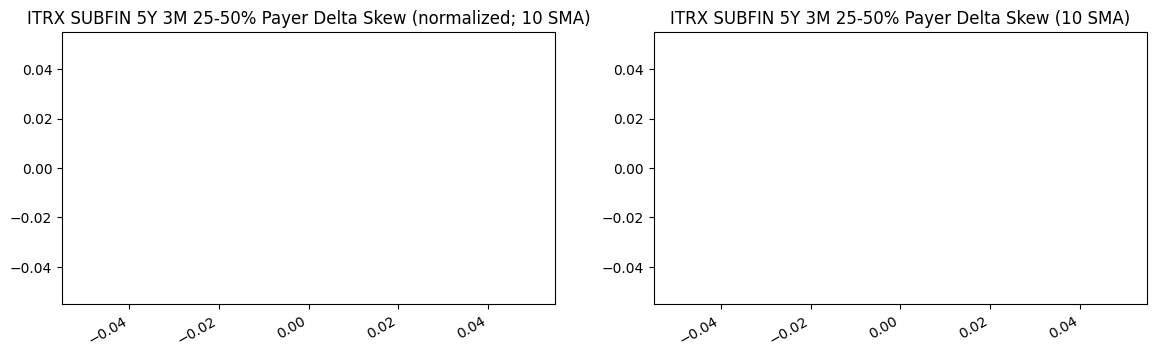

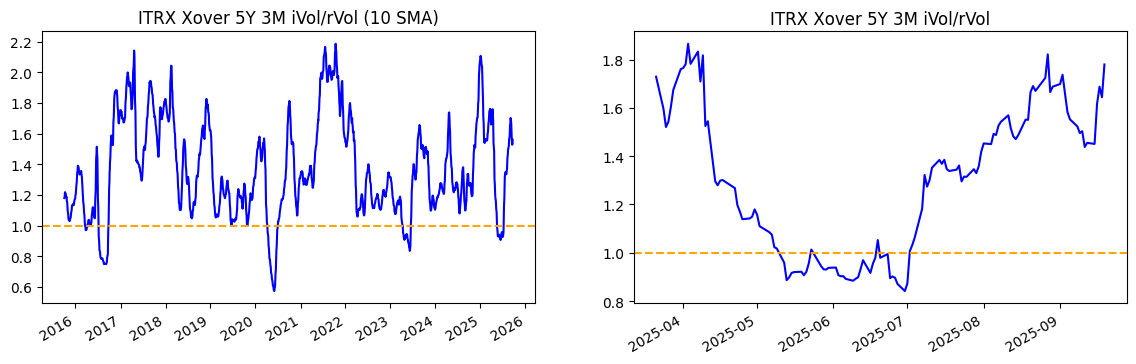

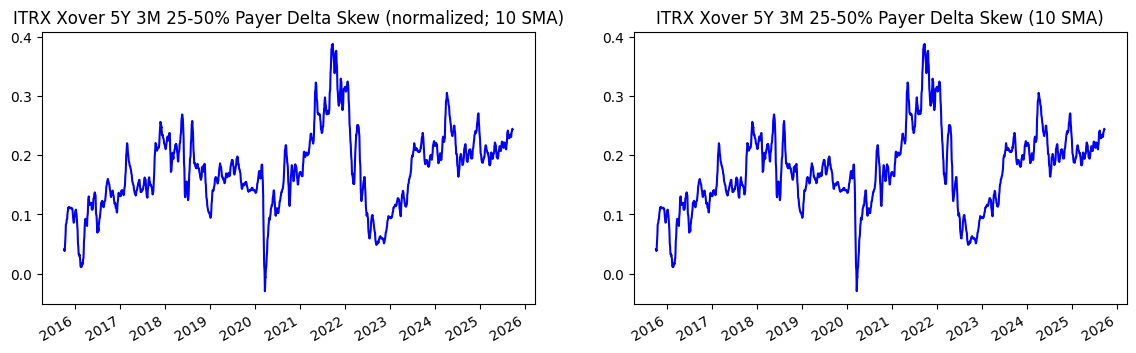

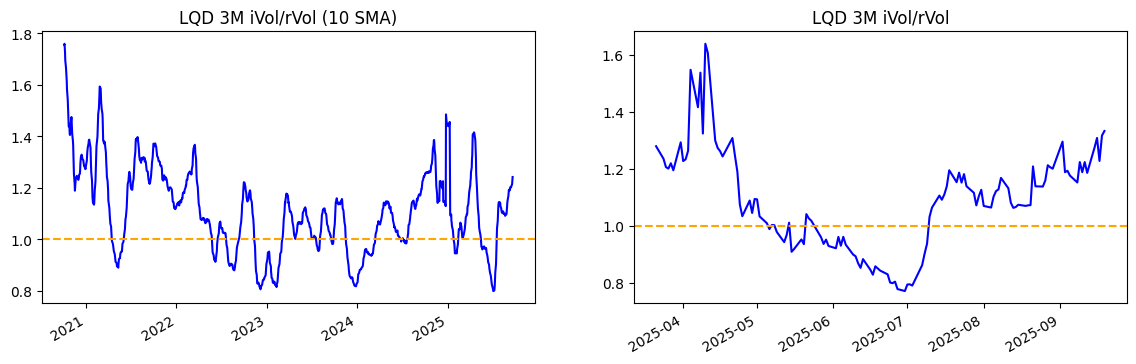

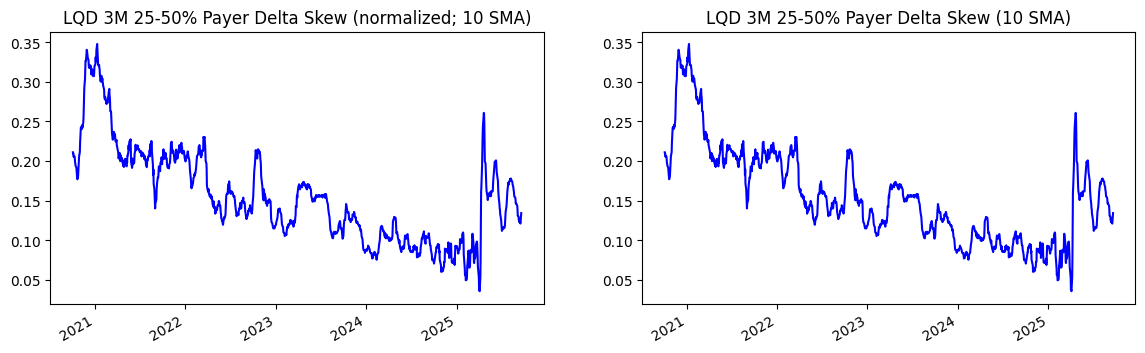

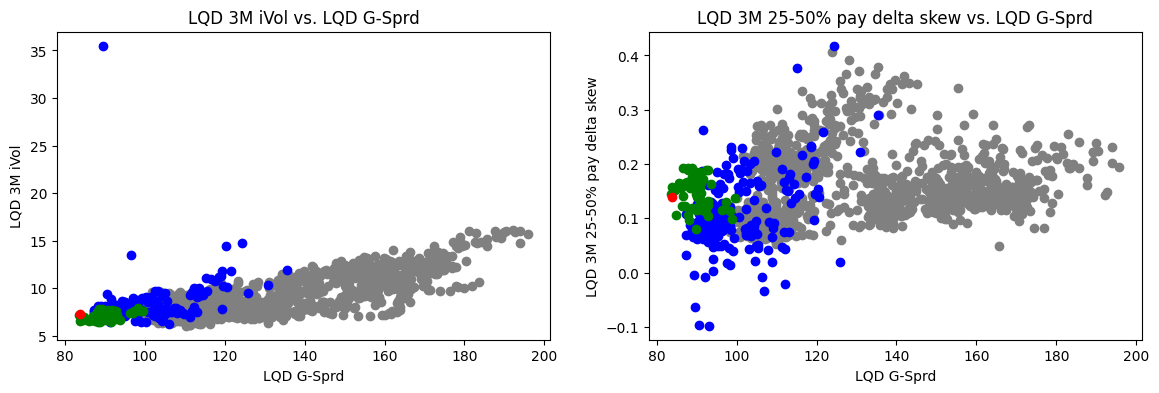

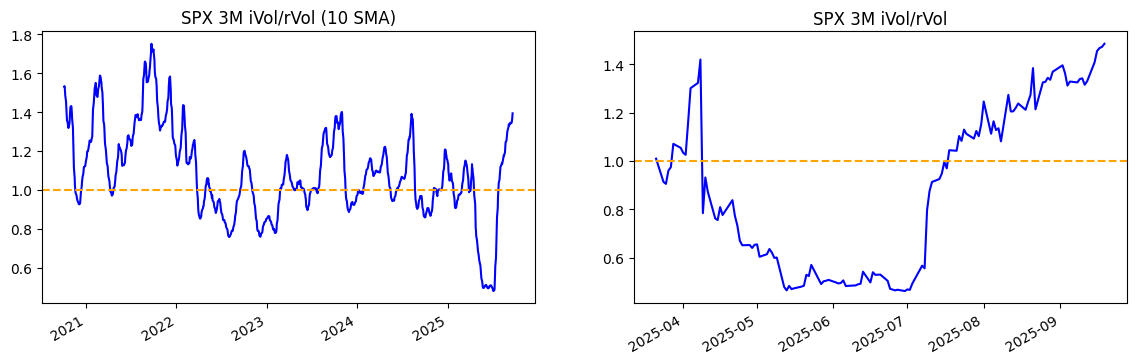

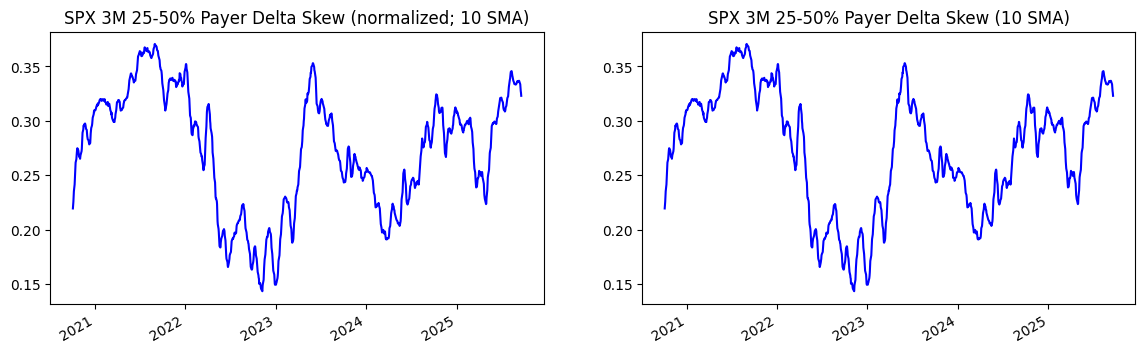

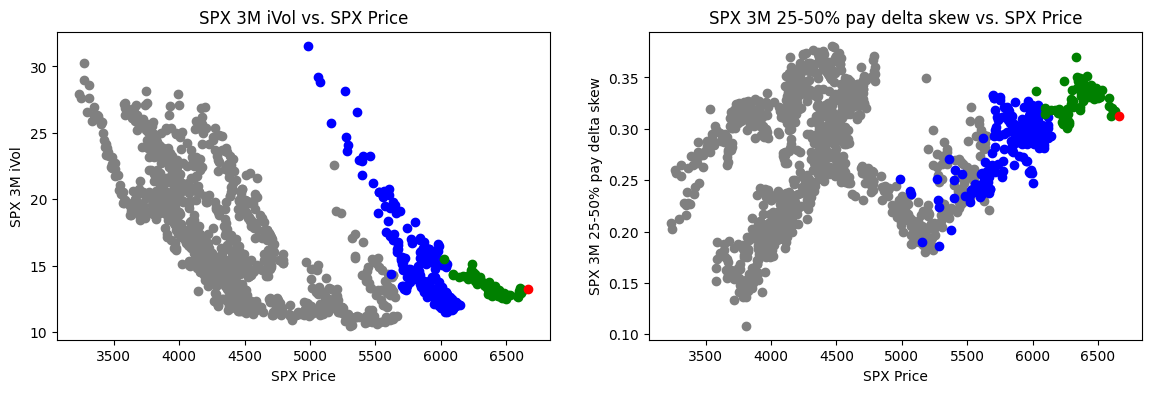

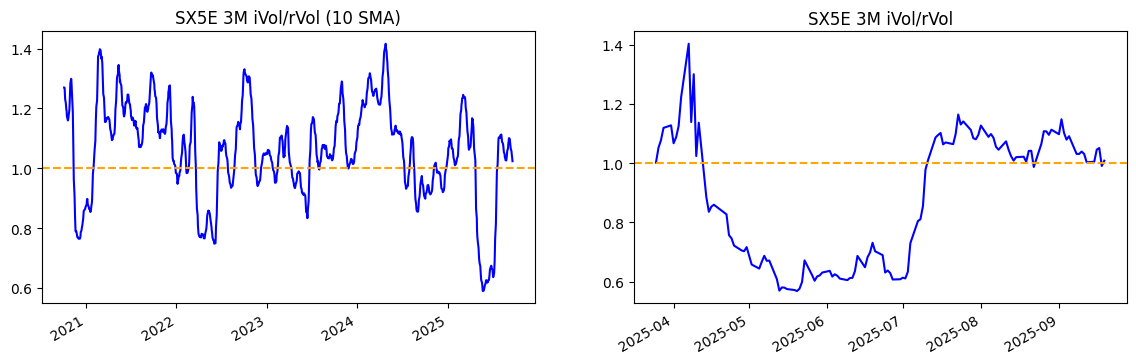

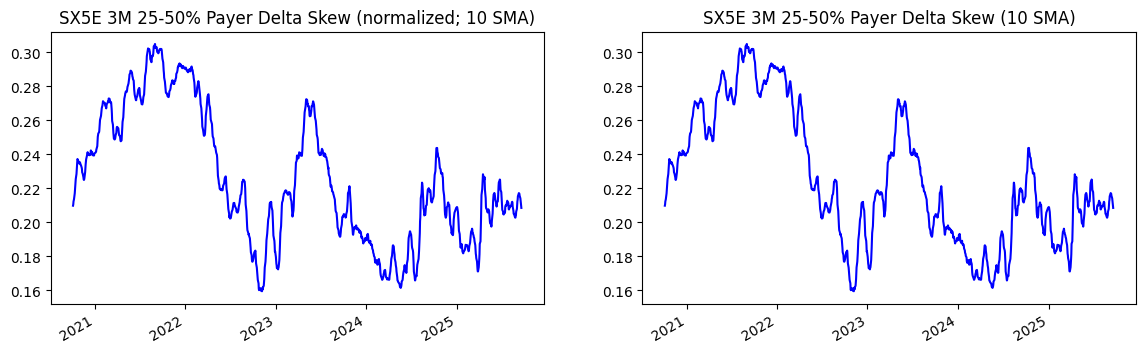

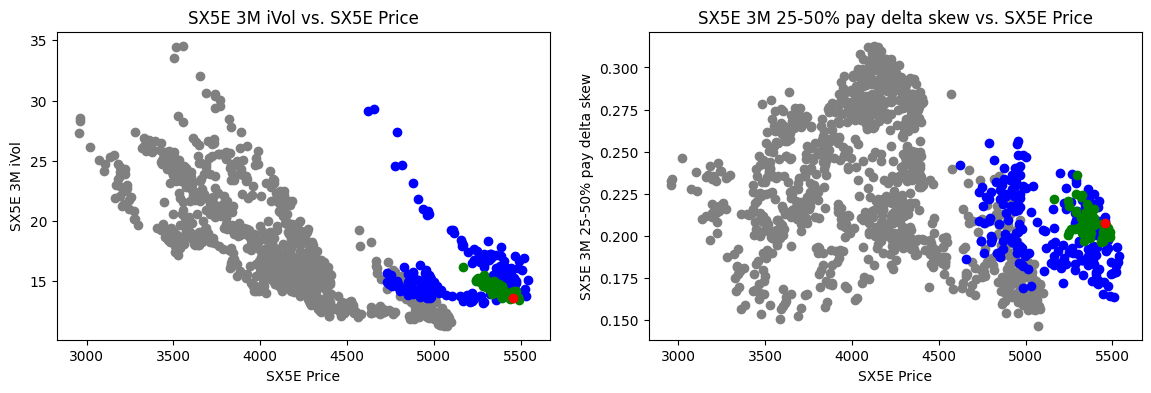

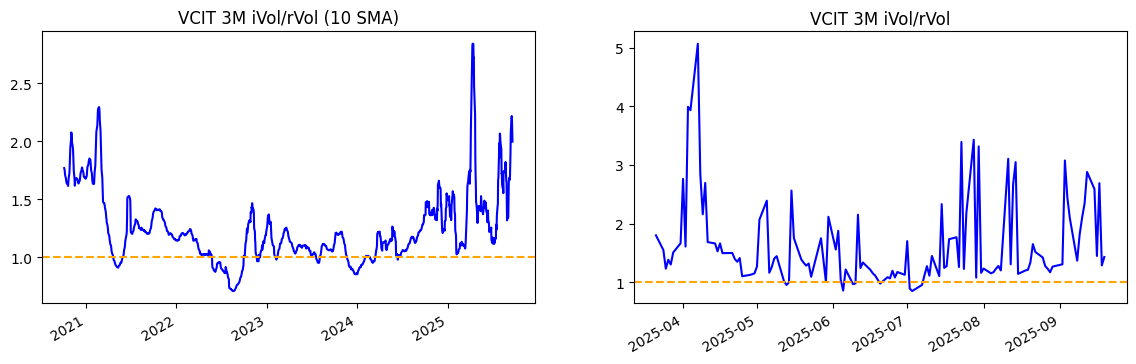

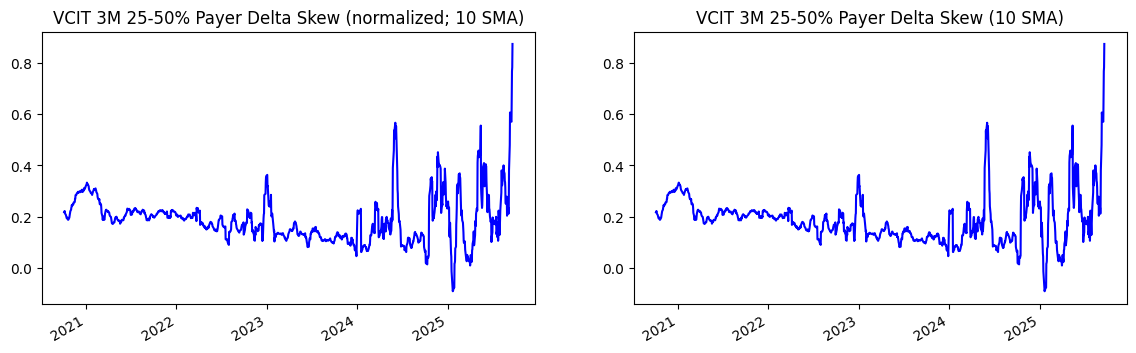

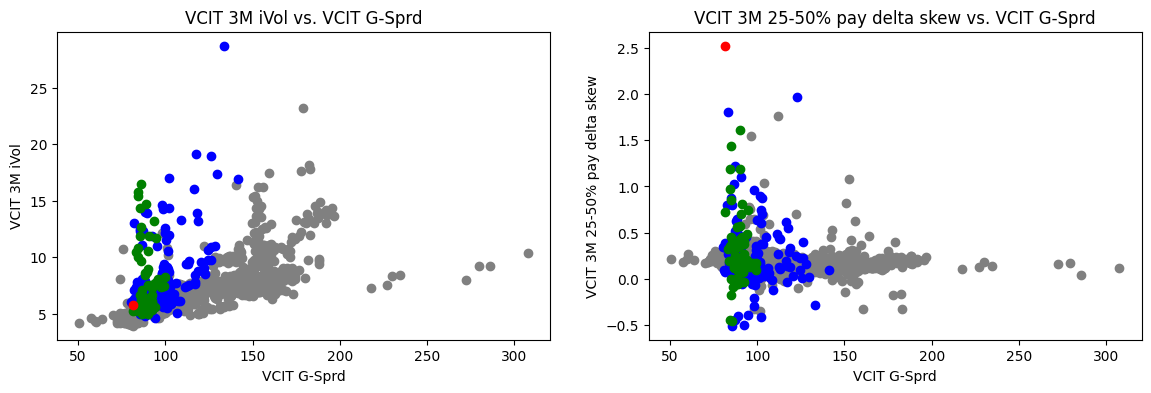

In [14]:
names = list(sorted(set([item.split("_")[0] for item in df.columns])))
names.remove("EMB")
df1 = pd.DataFrame(index=df.index)
for col in bbg.columns:
    df1[col] = bbg[col]
for item in names:            
    df1[f"{item} 3M iVol"] = df[f"{item}_50D_3M_iVol"]
    df1[f"{item} 3M iVol/rVol"] = df[f"{item}_50D_3M_iVol"] / df[f"{item}_3M_rVol"]
    df1[f"{item} 3M 25-50% pay delta skew (normalized)"] = (df[f"{item}_25D_3M_iVol"] -\
                                                df[f"{item}_50D_3M_iVol"])/df[f"{item}_50D_3M_iVol"]
    df1[f"{item} 3M 25-50% pay delta skew"] = (df[f"{item}_25D_3M_iVol"] -\
                                                df[f"{item}_50D_3M_iVol"])/df[f"{item}_50D_3M_iVol"]

for item in names:
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    df1[f"{item} 3M iVol/rVol"].dropna().rolling(10).mean().plot(ax=axs[0],color="blue")
    axs[0].axhline(1,color="orange",linestyle="--")
    axs[0].set_title(f"{item} 3M iVol/rVol (10 SMA)")
    df1[f"{item} 3M iVol/rVol"].dropna().iloc[-126:].plot(ax=axs[1],color="blue")
    axs[1].axhline(1,color="orange",linestyle="--")
    axs[1].set_title(f"{item} 3M iVol/rVol")
    plt.show()
    
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    df1[f"{item} 3M 25-50% pay delta skew (normalized)"].dropna().rolling(10).\
        mean().plot(ax=axs[0],color="blue")
    axs[0].set_title(f"{item} 3M 25-50% Payer Delta Skew (normalized; 10 SMA)")
    
    df1[f"{item} 3M 25-50% pay delta skew"].dropna().rolling(10).\
        mean().plot(ax=axs[1],color="blue")
    axs[1].set_title(f"{item} 3M 25-50% Payer Delta Skew (10 SMA)")
    plt.show()

    for name in bbg.columns:
        if name.startswith(item):
            scatter_df = pd.concat([df1[f"{item} 3M iVol"], bbg[name]],axis=1).sort_index().dropna().copy()
            scatter_df1 = pd.concat([df1[f"{item} 3M 25-50% pay delta skew"], bbg[name]],axis=1).sort_index().dropna().copy()
            
            fig, axs = plt.subplots(1, 2, figsize=(14,4))
            
            axs[0].scatter(scatter_df[name].iloc[:-252], scatter_df[f"{item} 3M iVol"].iloc[:-252], color="gray")
            axs[0].scatter(scatter_df[name].iloc[-252:-63], scatter_df[f"{item} 3M iVol"].iloc[-252:-63], color="blue")
            axs[0].scatter(scatter_df[name].iloc[-63:-1], scatter_df[f"{item} 3M iVol"].iloc[-63:-1], color="green")
            axs[0].scatter(scatter_df[name].iloc[-1:], scatter_df[f"{item} 3M iVol"].iloc[-1:], color="red")
            
            axs[0].set_ylabel(f"{item} 3M iVol")
            axs[0].set_xlabel(f"{name}")
            axs[0].set_title(f"{item} 3M iVol vs. {name}")
            
            axs[1].scatter(scatter_df1[name].iloc[:-252], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[:-252], color="gray")
            axs[1].scatter(scatter_df1[name].iloc[-252:-63], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[-252:-63], color="blue")
            axs[1].scatter(scatter_df1[name].iloc[-63:-1], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[-63:-1], color="green")
            axs[1].scatter(scatter_df1[name].iloc[-1:], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[-1:], color="red")
            axs[1].set_ylabel(f"{item} 3M 25-50% pay delta skew")
            axs[1].set_xlabel(f"{name}")
            axs[1].set_title(f"{item} 3M 25-50% pay delta skew vs. {name}")

            plt.show()
            
            
    # break

In [6]:
df

,CDX IG 5Y_3M_iVol,CDX IG 5Y_3M_rVol,CDX HY 5Y_3M_iVol,CDX HY 5Y_3M_rVol,ITRX Main 5Y_3M_iVol,ITRX Main 5Y_3M_rVol,ITRX Xover 5Y_3M_iVol,ITRX Xover 5Y_3M_rVol,ITRX SNRFIN 5Y_3M_iVol,ITRX SNRFIN 5Y_3M_rVol,...,VCIT_3M_rVol,EMB_50D_3M_iVol,EMB_25D_3M_iVol,EMB_3M_rVol,IEAC_50D_3M_iVol,IEAC_25D_3M_iVol,IEAC_3M_rVol,IHYG_50D_3M_iVol,IHYG_25D_3M_iVol,IHYG_3M_rVol
2015-09-21,0.484278,0.395218,0.497015,0.368087,0.550308,0.553395,0.624150,0.575794,0.604925,0.660182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-22,0.498971,0.397251,0.514101,0.373466,0.560883,0.566537,0.607228,0.599320,0.587881,0.670096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-23,0.486461,0.387686,0.500698,0.366509,0.556452,0.566958,0.620845,0.599623,0.583871,0.670816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-24,0.518060,0.388957,0.525584,0.367660,0.575463,0.498662,0.619030,0.530526,0.591940,0.571674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-25,0.518347,0.389465,0.538993,0.365341,0.573604,0.495770,0.614694,0.527527,0.589322,0.572005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-18,0.432601,0.278260,0.343275,0.244427,0.433403,0.292992,0.427213,0.262354,0.492864,0.312472,...,4.036842,9.7867,8.5329,4.88903,4.5657,5.0882,2.20099,2.2909,4.5064,2.122757
2025-09-19,0.433258,0.263113,0.341812,0.233708,0.435589,0.266224,0.428999,0.243317,0.496759,0.293519,...,4.03667,8.1727,9.3948,4.903768,4.5643,5.1925,2.188573,2.0227,4.452,2.034593
2025-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.03667,NaN,NaN,4.903768,NaN,NaN,2.198136,NaN,NaN,1.999897
2025-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.045543,NaN,NaN,4.926974,NaN,NaN,2.215462,NaN,NaN,2.008928


In [79]:
df1

,HYG G-Sprd,LQD G-Sprd,EMB G-Sprd,VCIT G-Sprd,IHYG G-Sprd,IEAC G-Sprd,SPX Price,SX5E Price,CDX HY 5Y 3M iVol/rVol,CDX HY 5Y 3M 25-50% pay delta skew (normalized),CDX HY 5Y 3M 25-50% pay delta skew
2020-09-23,568.5690,177.7550,433.7340,131.4580,493.4960,141.2160,3236.92,3180.11,1.789817,-0.108858,-0.108858
2020-09-24,567.3930,181.7590,433.2700,136.5350,509.0910,142.0430,3246.59,3159.64,1.828338,-0.107549,-0.107549
2020-09-25,570.0570,183.5070,427.6460,138.7100,524.0020,145.1860,3298.46,3137.06,1.896432,-0.108167,-0.108167
2020-09-28,553.8080,178.3000,424.9830,133.7960,503.8540,144.0790,3351.60,3223.19,1.770784,-0.123399,-0.123399
2020-09-29,552.9150,179.8760,428.1170,133.7080,502.7540,143.7230,3335.47,3214.30,1.791755,-0.124321,-0.124321
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16,329.1401,87.1075,225.8448,84.7622,332.8352,97.3559,6606.76,5372.31,1.365600,-0.126534,-0.126534
2025-09-17,329.8223,86.5734,223.6023,84.2179,330.7074,97.5699,6600.35,5369.70,1.428421,-0.129156,-0.129156
2025-09-18,318.5067,83.6085,224.7235,81.2520,321.7097,95.2893,6631.96,5456.67,1.422967,-0.122926,-0.122926
2025-09-19,324.5447,83.8122,225.9942,81.3539,318.5884,94.9912,6664.36,5458.42,1.482040,-0.125369,-0.125369


In [1]:

def drop_keys_with_cdsspread(labels):
    keys_to_drop = [key for key, value in labels.items() if '_CDSSPREAD_' in value or '_THEOBASIS' in value or ',DISPERSION' in value]
    for key in keys_to_drop:
        del labels[key]
    return labels

labels = drop_keys_with_cdsspread(labels)

tickers = [item for item in labels.values()]



df.columns=df.columns.str.replace("DJ CDX.NA.IG Main On the run","IG")\
.str.replace("Emerging Markets CDX.EM On the run","EM")
df.columns=df.columns.str.replace("DJ CDX.NA.HY 100 On the run","HY")\
.str.replace("Emerging Markets CDX.EM IG On the run","EM IG")
df.columns=df.columns.str.replace("Emerging Markets CDX.EM HY On the run","EM HY")\
.str.replace("iTraxx Europe Main On the run","Main")
df.columns=df.columns.str.replace("iTraxx Europe Crossover On the run","Xover")\
.str.replace("iTraxx Europe Senior Financials On the run","Sr. Fin")
df.columns=df.columns.str.replace("iTraxx Europe Sub Financials On the run","Sub. Fin")\
.str.replace(" Unfunded JPMorgan "," ")
df.columns=df.columns.str.replace(" CDS "," ").str.replace(" Mid","")
df.columns=df.columns.str.replace("(","").str.replace(")","").str.replace("Yr","Y")
df.columns=df.columns.str.replace(" Unfunded "," ").str.replace("Spread","Sprd")
df.columns=df.columns.str.replace("DJ CDX.NA.IG Main","IG").str.replace("DJ CDX.NA.HY 100","HY")
df.columns=df.columns.str.replace("Adjusted","Adj.").str.replace("and","&")
df.columns=df.columns.str.replace(" Modified "," ").str.replace("EMBIG CORE","EMBIG")\
.str.replace("EMBIG Cum Tot Ret Idx","EMBIG TR Index")

z_scores = (df - df.mean()) / df.std()
outlier_mask = (z_scores < -5) | (z_scores > 5)
df_outliers_only = df.copy()
df_outliers_only[outlier_mask] = np.nan
df_outliers_only.interpolate(inplace=True)
df.update(df_outliers_only)

bbg1=blp.bdh(tickers=['SPXT Index',\
                      'LF98ER Index','LF98TRUU Index',\
                      'LF98OAS Index', 'LT02TRUU Index', 'LT03TRUU Index', 'LT03MD Index',\
                      'LT09TRUU Index', 'LT09MD Index', 'RU20INTR Index'],
             # flds=['TOT_RETURN_INDEX_GROSS_DVDS'],\
            flds=['LAST_PRICE'],\
             start_date=df.index[0],end_date=df.index[-1])

bbg1.columns=['_'.join(col) for col in bbg1.columns]
bbg1.columns = bbg1.columns.str.replace('_LAST_PRICE','',regex=True)
bbg1.columns = 'BBG_' + bbg1.columns

bbg2=blp.bdh(tickers=['EMB US Equity',],
             flds=['TOT_RETURN_INDEX_GROSS_DVDS'],\
             start_date=df.index[0],end_date=df.index[-1])

bbg2.columns=['_'.join(col) for col in bbg2.columns]
bbg2.columns = bbg2.columns.str.replace('_TOT_RETURN_INDEX_GROSS_DVDS','_TR',regex=True)
bbg2.columns = 'BBG_' + bbg2.columns

dfc = pd.concat([df,bbg1,bbg2],axis=1)
dfc = dfc.sort_index()
df=dfc.copy()

target_columns = [col for col in df.columns if (col.endswith("Index") 
                                               or col.endswith("Return") 
                                               or (col.startswith("BBG_") and ('Equity' in col)))]

for col in target_columns:
    df[f'{col}_FWD_1M'] = (df[col].shift(-21)/df[col]-1)*100
    df[f'{col}_FWD_3M'] = (df[col].shift(-63)/df[col]-1)*100
    df[f'{col}_FWD_6M'] = (df[col].shift(-126)/df[col]-1)*100

mask = df.isna()
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.interpolate(inplace=True)
df[mask]=np.nan

partial_replacements = {
    "LF98TRUU Index": "US_HY_Tot._Rtn._Unhg.",
    "LF98OAS Index": "US_HY_Avg_OAS",
    "LT02TRUU Index": "UST_3_5Y_Return",
    "LT03TRUU Index": "UST_5_7Y_Return",
    "LT03MD Index": "UST_5_7Y_Duration",
    "LT09TRUU Index": "UST_7_10Y_Return",
    "LT09MD Index": "UST_7_10Y_Duration"
}

for old, new in partial_replacements.items():
    df.columns = df.columns.str.replace(old, new, regex=True)

df = df[[col for col in df.columns if not (('Duration' in col) and ('FWD' in col))]].copy()

options = df.columns.to_list()

new_list = ['BBG_UST_7_10Y_Return', 'BBG_UST_7_10Y_Duration', \
            'BBG_UST_5_7Y_Return', 'BBG_UST_5_7Y_Duration', \
            'EMBIG TR Index', 'EMBIG IR Duration to Worst']

dfA = df[[item for item in options if (item.endswith(('Return', 'Index','Duration')) and not item.startswith('BBG_')) or item in new_list or 'FWD' in item]].copy()
dfA.columns = dfA.columns.str.replace("Index","Total Return")
dfA = dfA[sorted(dfA.columns)].copy()

columns = dfA.columns
unique_names = columns.str.replace(" Duration","").str.replace(" Total Return","")
unique_names = sorted(set(unique_names))
pairs =list(itertools.combinations(unique_names,2))

results = pd.DataFrame()

for name1, name2 in pairs:
    for duration in ['Average']:
        for period in ['1M','3M','6M']:
            if (name1.rsplit(' ',1)[0] == name2.rsplit(' ',1)[0]) and not('FWD' in name1) and not('FWD' in name2):
                if period == '1M':
                    i = 21
                elif period == '3M':
                    i = 63
                else: i = 126
                
                name1_dur = f'{name1} Duration'
                name2_dur = f'{name2} Duration'
                name1_return = f'{name1} Total Return_FWD_{period}'
                name2_return = f'{name2} Total Return_FWD_{period}'
                dur_5y = f'{name1.rsplit(' ',1)[0]} 5Y Duration'
                if {name1_dur, name1_return, name2_dur, name2_return}.issubset(dfA.columns):
                    result_name = f'{duration}_{name1} - {name2} Dur. Adj. Rtn._FWD_{period}'
                    results[result_name] = dfA[name1_return] - (dfA[name1_dur].rolling(window=(i+1),min_periods=1).mean().shift(-i) / dfA[name2_dur].rolling(window=(i+1),min_periods=1).mean().shift(-i)) * dfA[name2_return]

results['Average_UST_7_10Y_Return_EMB_Hg._FWD_1M'] = (dfA['EMBIG IR Duration to Worst'].rolling(window=(22),min_periods=1).mean().shift(-21)/dfA['BBG_UST_7_10Y_Duration'].rolling(window=(22),min_periods=1).mean().shift(-21))\
*dfA['BBG_UST_7_10Y_Return_FWD_1M']
results['Average_UST_5_7Y_Return_EMB_Hg._FWD_1M'] = (dfA['EMBIG IR Duration to Worst'].rolling(window=(22),min_periods=1).mean().shift(-21)/dfA['BBG_UST_5_7Y_Duration'].rolling(window=(22),min_periods=1).mean().shift(-21))\
*dfA['BBG_UST_5_7Y_Return_FWD_1M']
results['Average_UST_7_10Y_Return_EMB_Hg._FWD_3M'] = (dfA['EMBIG IR Duration to Worst'].rolling(window=(64),min_periods=1).mean().shift(-63)/dfA['BBG_UST_7_10Y_Duration'].rolling(window=(64),min_periods=1).mean().shift(-63))\
*dfA['BBG_UST_7_10Y_Return_FWD_3M']
results['Average_UST_5_7Y_Return_EMB_Hg._FWD_3M'] = (dfA['EMBIG IR Duration to Worst'].rolling(window=(64),min_periods=1).mean().shift(-63)/dfA['BBG_UST_5_7Y_Duration'].rolling(window=(64),min_periods=1).mean().shift(-63))\
*dfA['BBG_UST_5_7Y_Return_FWD_3M']
results['Average_UST_7_10Y_Return_EMB_Hg._FWD_6M'] = (dfA['EMBIG IR Duration to Worst'].rolling(window=(127),min_periods=1).mean().shift(-126)/dfA['BBG_UST_7_10Y_Duration'].rolling(window=(127),min_periods=1).mean().shift(-126))\
*dfA['BBG_UST_7_10Y_Return_FWD_6M']
results['Average_UST_5_7Y_Return_EMB_Hg._FWD_6M'] = (dfA['EMBIG IR Duration to Worst'].rolling(window=(127),min_periods=1).mean().shift(-126)/dfA['BBG_UST_5_7Y_Duration'].rolling(window=(127),min_periods=1).mean().shift(-126))\
*dfA['BBG_UST_5_7Y_Return_FWD_6M']

results = results.loc[:, results.columns.str.contains("FWD")]
results.replace(0.0, np.nan, inplace=True)

df = pd.concat([df,results],axis=1)
df.columns = df.columns.str.replace("Average_","")
df = df[[col for col in df.columns if 'FWD' in col]]
dfg = df.copy()


dq = DataQuery(
    client_id='jbAIMF2Tkp0JO3sc',
    client_secret='d7qfzgt55pddjs352sgxosFyI4t2eja07k7opbi6wg9oqjc1OjkdAksn1btmnugeMjchcx2vwTsJupw',
    calendar = 'CAL_USBANK',
)




job = dq.create_job(expressions = list(labels.values()))
dq.start_date = 'TODAY-10Y'
job.execute()
df = pd.DataFrame()
df = job.to_pivot_table()
df = df.T
df.index.name = 'Date'
df.index = pd.to_datetime(df.index, format='%Y%m%d').date
df.columns.name = None

df1 = pd.DataFrame()
for key in labels:
    df1[key] = df[labels[key]]

df1 = df1[list(labels.keys())].copy()
clear_output(wait=False)
df1.dropna(axis=1, how='all', inplace=True)


df = df1.copy()

df['Main 3M Vol Skew 75-25 Delta_Calculated'] = df['Main 75% 3M Implied Vol_Call'] - df['Main 25% 3M Implied Vol_Call']
df['Xover 3M Vol Skew 75-25 Delta_Calculated'] = df['Xover 75% 3M Implied Vol_Call'] - df['Xover 25% 3M Implied Vol_Call']

cols_to_drop = [
    'Main 25% 3M Implied Vol_Call', 'Main 25% 3M Implied Vol_Put',
    'Main 75% 3M Implied Vol_Call', 'Main 75% 3M Implied Vol_Put',
    'Xover 25% 3M Implied Vol_Call', 'Xover 25% 3M Implied Vol_Put',
    'Xover 75% 3M Implied Vol_Call', 'Xover 75% 3M Implied Vol_Put'
]

df = df.drop(columns=cols_to_drop).copy()

df = pd.concat([df,dfg],axis=1)

options = df.columns.to_list()

time = ['All','5Y','3Y','2Y','1Y','6M','3M']

df1=pd.DataFrame()

dropdown1 = Dropdown(options=options, description='A:')
dropdown2 = Dropdown(options=options, description='B:')
dropdown3 = Dropdown(options=options, description='C:')
dropdown4 = Dropdown(options=options, description='D:')
dropdown5 = Dropdown(options=options, description='E:')
dropdown6 = Dropdown(options=options, description='F:')
dropdown7 = Dropdown(options=options, description='G:')
dropdown8 = Dropdown(options=options, description='H:')
dropdown9 = Dropdown(options=options, description='I:')
dropdown10 = Dropdown(options=options, description='J:')
dropdown11 = Dropdown(options=options, description='K:')
dropdown12 = Dropdown(options=options, description='L:')
dropdown13 = Dropdown(options=time, description='Time')

row1 = HBox([dropdown1, dropdown2, dropdown3])
row2 = HBox([dropdown4, dropdown5, dropdown6])
row3 = HBox([dropdown7, dropdown8, dropdown9])
row4 = HBox([dropdown10, dropdown11, dropdown12])
row5 = HBox([dropdown13])

dropdown_box = VBox([row1, row2,row3,row4,row5])
display(dropdown_box)

expression_input1 = Text(description='Horizontal Axis:')
expression_input2 = Text(description='Vertical Axis:')
display(expression_input1)
display(expression_input2)

def get_values():
    return dropdown1.value, dropdown2.value, dropdown3.value, \
    dropdown4.value, dropdown5.value, dropdown6.value, \
    dropdown7.value, dropdown8.value, dropdown9.value, \
    dropdown10.value, dropdown11.value, dropdown12.value, \
    dropdown13.value

submit_button = Button(description="Submit")
display(submit_button)

output = Output()
display(output)

def on_button_clicked(b):  
    with output:
        global df
        global df1
        global df2
        clear_output()
        selected_values = get_values()
        expression1 = expression_input1.value.upper()
        expression2 = expression_input2.value.upper()
        
        col_map = {'A': selected_values[0], 'B': selected_values[1], 'C': selected_values[2], 
                   'D': selected_values[3], 'E': selected_values[4], 'F': selected_values[5],
                   'G': selected_values[6], 'H': selected_values[7], 'I': selected_values[8], 
                   'J': selected_values[9], 'K': selected_values[10], 'L': selected_values[11]}
        
        for key, value in col_map.items():
            expression1 = expression1.replace(key, key.lower())
            expression2 = expression2.replace(key, key.lower())
        
        a, b, c, d, e, f, g, h, i, j, k, l = sp.symbols('a b c d e f g h i j k l')
        expr1 = sp.sympify(expression1)
        expr11 = sp.sympify(expression1)
        expr2 = sp.sympify(expression2) if expression2 else None
        expr21 = sp.sympify(expression2) if expression2 else None

        cols_to_check = [col_map['A'], col_map['B'], col_map['C'], \
                         col_map['D'], col_map['E'], col_map['F'], \
                         col_map['G'], col_map['H'], col_map['I'], \
                         col_map['J'], col_map['K'], col_map['L'] ]

        alphabets1 = re.findall(r'[a-zA-Z]', expression1)
        alphabets2 = re.findall(r'[a-zA-Z]', expression2)
        alphabets = list(sorted(set(alphabets1 + alphabets2)))
        filtered_alphabets = [char for char in alphabets if char in 'abcdefghijkl']
        upper_case_alphabets = [char.upper() for char in filtered_alphabets]
        cols_to_check = [col_map[char] for char in upper_case_alphabets]
        
        df1 = df.copy()
        df2 = df.copy()
        df1.dropna(subset=cols_to_check,inplace=True)

        replacements = {
            'A': selected_values[0], 'a': selected_values[0],
            'B': selected_values[1], 'b': selected_values[1],
            'C': selected_values[2], 'c': selected_values[2],
            'D': selected_values[3], 'd': selected_values[3],
            'E': selected_values[4], 'e': selected_values[4],
            'F': selected_values[5], 'f': selected_values[5],
            'G': selected_values[6], 'g': selected_values[6],
            'H': selected_values[7], 'h': selected_values[7],
            'I': selected_values[8], 'i': selected_values[8],
            'J': selected_values[9], 'j': selected_values[9],
            'K': selected_values[10], 'k': selected_values[10],
            'L': selected_values[11], 'l': selected_values[11]
        }

        regex = re.compile("|".join(re.escape(key) for key in replacements.keys()))
        expr111 = regex.sub(lambda match: replacements[match.group(0)],str(expr11))
        expr211 = regex.sub(lambda match: replacements[match.group(0)],str(expr21))

        df1['Expression 1'] = df1.apply(lambda row: expr1.evalf(subs={\
            a: row[col_map['A']], b: row[col_map['B']], 
            c: row[col_map['C']], d: row[col_map['D']], 
            e: row[col_map['E']], f: row[col_map['F']],
            g: row[col_map['G']], h: row[col_map['H']],
            i: row[col_map['I']], j: row[col_map['J']], 
            k: row[col_map['K']], l: row[col_map['L']] }), axis=1).astype(float)       
        df1['Expression 2'] = df1.apply(lambda row: expr2.evalf(subs={\
            a: row[col_map['A']], b: row[col_map['B']], 
            c: row[col_map['C']], d: row[col_map['D']], 
            e: row[col_map['E']], f: row[col_map['F']],
            g: row[col_map['G']], h: row[col_map['H']],
            i: row[col_map['I']], j: row[col_map['J']], 
            k: row[col_map['K']], l: row[col_map['L']] }) if expr2 else np.nan, axis=1).astype(float)

        plot_exp1 = np.nan
        plot_exp2 = np.nan
        
        if ('FWD' in expr111) and not ('FWD' in expr211):
            df2['Expression 2'] = df2.apply(lambda row: expr2.evalf(subs={\
            a: row[col_map['A']], b: row[col_map['B']], 
            c: row[col_map['C']], d: row[col_map['D']], 
            e: row[col_map['E']], f: row[col_map['F']],
            g: row[col_map['G']], h: row[col_map['H']],
            i: row[col_map['I']], j: row[col_map['J']], 
            k: row[col_map['K']], l: row[col_map['L']] }), axis=1).astype(float)
            plot_exp2 = df2.iloc[-1]['Expression 2'].astype(float)
        if ('FWD' in expr211) and not ('FWD' in expr111):
            df2['Expression 1'] = df2.apply(lambda row: expr1.evalf(subs={\
            a: row[col_map['A']], b: row[col_map['B']], 
            c: row[col_map['C']], d: row[col_map['D']], 
            e: row[col_map['E']], f: row[col_map['F']],
            g: row[col_map['G']], h: row[col_map['H']],
            i: row[col_map['I']], j: row[col_map['J']], 
            k: row[col_map['K']], l: row[col_map['L']] }), axis=1).astype(float)
            plot_exp1 = df2.iloc[-1]['Expression 1'].astype(float)
        
        def filter_df(dfx1, time_period):
            dfx=dfx1.copy()
            dfx.index=pd.to_datetime(dfx.index)
            if time_period == 'All':
                return dfx
            else:
                now = datetime.now()
                if time_period == '5Y':
                    start_date = now - timedelta(days=5*365)
                elif time_period == '3Y':
                    start_date = now - timedelta(days=3*365)
                elif time_period == '2Y':
                    start_date = now - timedelta(days=2*365)
                elif time_period == '1Y':
                    start_date = now - timedelta(days=365)
                elif time_period == '6M':
                    start_date = now - timedelta(days=6*30)
                elif time_period == '3M':
                    start_date = now - timedelta(days=3*30)
                return dfx[dfx.index.date >= start_date.date()]    

        def update_plot(plot_exp1,plot_exp2):
            if expression2:
                fig = make_subplots(rows=2, cols=1, shared_xaxes=False, \
                                    vertical_spacing=0.1, specs=[ [{"secondary_y":False}], [{"secondary_y":True}] ],\
                                   subplot_titles=(f'Scatter Plot from {df1.index[0].date()} to {df1.index[-1].date()}',\
                                                  f'{expr111}: {df1[df1.columns[-2]][-1]:.3f}   &   {expr211}: {df1[df1.columns[-1]][-1]:.3f}'))
                
                x_scatter = df1[df1.columns[-2]]
                y_scatter = df1[df1.columns[-1]]
    
                coeffs = np.polyfit(x_scatter,y_scatter,2)
                polynomial = np.poly1d(coeffs)
                x_poly=np.linspace(min(x_scatter),max(x_scatter),500)
                y_poly=polynomial(x_poly)
                y_pred = polynomial(x_scatter)
                r2=r2_score(y_scatter,y_pred)
                equation_text = f"y = {coeffs[0]:.4f}*x² + {coeffs[1]:.4f}*x + {coeffs[2]:.4f}"
    
                residuals = y_scatter-y_pred
                res_sum=np.sum(residuals**2)
                dof=len(x_scatter)-len(coeffs)
                res_var = res_sum / dof
                se = np.sqrt(res_var)
                conf_upper = y_poly + 2 * se
                conf_lower = y_poly - 2 * se
                
                fig.add_trace(go.Scatter(x=df1[df1.columns[-2]][-63:-1], y=df1[df1.columns[-1]][-63:-1], \
                                         name='< 3 months', mode='markers',marker=dict(color='green')), \
                              row=1,col=1,secondary_y=False)
                fig.add_trace(go.Scatter(x=df1[df1.columns[-2]][-252:-63], y=df1[df1.columns[-1]][-252:-63], \
                                         name='> 3 months & < 1 year', mode='markers',marker=dict(color='blue')), \
                              row=1,col=1,secondary_y=False)
                fig.add_trace(go.Scatter(x=df1[df1.columns[-2]][:-252], y=df1[df1.columns[-1]][:-252], \
                                         name='> 1 year', mode='markers',marker=dict(color='gray')), \
                              row=1,col=1,secondary_y=False)
                
                fig.add_trace(go.Scatter(x=[df1[df1.columns[-2]].iloc[-1]], y=[df1[df1.columns[-1]].iloc[-1]], \
                                         name=f'Value as of {df1.index[-1].date()}', mode='markers',marker=dict(color='red',size=10),\
                                         showlegend=True), row=1,col=1,secondary_y=False)      
                fig.add_trace(go.Scatter(x=x_poly, y=y_poly, \
                                         name=f'Polynomial Fit<br>R² = {r2:.3f}<br>{equation_text}', \
                                         mode='lines', line=dict(color='orange'),
                                         showlegend=True), row=1,col=1,secondary_y=False) 
               
                fig.add_trace(go.Scatter(x=x_poly, y=conf_upper, \
                                         name='Upper Confidence Band', \
                                         mode='lines', line=dict(color='orange',dash='dash'),
                                         showlegend=True), row=1,col=1,secondary_y=False) 
                fig.add_trace(go.Scatter(x=x_poly, y=conf_lower, \
                                         name='Lower Confidence Band', fill='tonexty',\
                                         fillcolor='rgba(255,165,0,0.15)',
                                         mode='lines', line=dict(color='orange',dash='dash'),
                                         showlegend=True), row=1,col=1,secondary_y=False) 
                
                if ('FWD' in expr111) and not ('FWD' in expr211):
                    plot_exp2 = [plot_exp2] * len(df1[df1.columns[-2]])
                    fig.add_trace(go.Scatter(x=df1[df1.columns[-2]], y=plot_exp2, mode='lines',\
                     line=dict(color='red',width=1),name = f'{expr211} on {df2.index[-1]} was {plot_exp2[0]}'), \
                      row=1,col=1,secondary_y=False)

                if ('FWD' in expr211) and not ('FWD' in expr111):
                    plot_exp1 = [plot_exp1] * len(df1[df1.columns[-1]])
                    fig.add_trace(go.Scatter(x=plot_exp1, y=df1[df1.columns[-1]], mode='lines',\
                     line=dict(color='red',width=1), name = f'{expr111} on {df2.index[-1]} was {plot_exp1[0]}'), \
                      row=1,col=1,secondary_y=False)
                
                fig.add_trace(go.Scatter(x=df1.index, y=df1[df1.columns[-2]], name=expr111,\
                         line=dict(color='blue')), row=2,col=1,secondary_y=False)
                
                fig.add_trace(go.Scatter(x=[df1.index[0], df1.index[-1]], \
                 y=[df1[df1.columns[-2]][-1], df1[df1.columns[-2]][-1]], \
                 mode='lines', line=dict(dash='dash', color='blue'), \
                 name=f'Recent value of {expr111} is {df1[df1.columns[-2]][-1]}'),row=2,col=1,secondary_y=False)
                
                fig.add_trace(go.Scatter(x=df1.index, y=df1[df1.columns[-1]], \
                                     name=expr211, line=dict(color='green')),\
                                      row=2,col=1, secondary_y=True)
                
                fig.add_trace(go.Scatter(x=[df1.index[0], df1.index[-1]], \
                 y=[df1[df1.columns[-1]][-1], df1[df1.columns[-1]][-1]], \
                 mode='lines', line=dict(dash='dash', color='green'), \
                 name=f'Recent value of {expr211} is {df1[df1.columns[-1]][-1]}'),row=2,col=1, secondary_y=True)
                
                fig.update_layout(
                hovermode='x unified',
                plot_bgcolor='white',
                paper_bgcolor='white',
                legend=dict(orientation="h",yanchor="bottom",xanchor="center",x=0.5,y=1.05),
                height=1900,
                width=1100)

            else:
                fig = make_subplots(rows=1, cols=1, shared_xaxes=False, \
                                    vertical_spacing=0.1, subplot_titles=(f'{expr111}: {df1[df1.columns[-2]][-1]}'))
                
                fig.add_trace(go.Scatter(x=df1.index, y=df1[df1.columns[-2]], name=expr111,\
                         line=dict(color='blue')), row=1,col=1)
                
                fig.add_trace(go.Scatter(x=[df1.index[0], df1.index[-1]], \
                 y=[df1[df1.columns[-2]][-1], df1[df1.columns[-2]][-1]], \
                 mode='lines', line=dict(dash='dash', color='blue'), \
                 name=f'Recent value of {expr111} is {df1[df1.columns[-2]][-1]}'))

                fig.update_layout(
                hovermode='x unified',
                plot_bgcolor='white',
                paper_bgcolor='white',
                legend=dict(orientation="h",yanchor="bottom",xanchor="center",x=0.5,y=1.05),
                height=800,
                width=1100)

            def split_label(label,n):
                return '<br>'.join([label[i:i+n] for i in range(0,len(label),n)])

            label1 = split_label(expr111,38)
            label2 = split_label(expr211,38)
          
            if expression2:
                fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True,\
                                 row=1,col=1,title=label1, showgrid=True, gridcolor='LightGrey',gridwidth=1)
                fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True,\
                                 row=1,col=1, title=label2, secondary_y=False, showgrid=True, gridcolor='LightGrey',gridwidth=1)
                fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, \
                                 title='Date', row=2, col=1, showgrid=True, gridcolor='LightGrey',gridwidth=1)
                fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, \
                                 title=label1, side='left', row=2,col=1, secondary_y=False, \
                                 showgrid=True, gridcolor='LightGrey',gridwidth=1, title_font = dict(color='blue'))
                fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, \
                                 title=label2, side='right', row=2,col=1, secondary_y=True, title_font = dict(color='green'))
            else:
                fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, \
                                 title='Date', row=1, col=1, showgrid=True, gridcolor='LightGrey',gridwidth=1)
                fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, \
                                 title=label1, side='left', row=1,col=1, secondary_y=False, showgrid=True, gridcolor='LightGrey',gridwidth=1)
            fig.show()
            
        df1 = filter_df(df1, selected_values[-1]).copy()  # This is where Time should go and is the value from last dropdown
        interact(update_plot(plot_exp1,plot_exp2))

submit_button.on_click(on_button_clicked)

Text(value='', description='Horizontal Axis:')

Text(value='', description='Vertical Axis:')

Button(description='Submit', style=ButtonStyle())

Output()